In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import math
import imageio
from PIL import Image, ImageDraw, ImageFont

In [2]:
def latticecreate(n):
    lattice = np.random.choice(a=[1,2,3],size=(n,n))
    return lattice

In [3]:
def calculateenergy(lattice,n,j,T,q):
    font = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 12)
    image=[]
    l=0
    la=0
    for k in range (0,n*10):
        for l in range (0,n*10):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            nb1=0
            nb2=0
            s=np.random.randint(1,q+1)
            
            if lattice[x,y]==lattice[(x+1)%n,y]:
                nb1=nb1+(1)
            if lattice[x,y]==lattice[x,(y+1)%n]:
                nb1=nb1+1
            if lattice[x,y]==lattice[(x-1)%n,y]:
                nb1=nb1+1
            if lattice[x,y]==lattice[x,(y-1)%n]:
                nb1=nb1+1
            if s==lattice[(x+1)%n,y]:
                nb2=nb2+(1)
            if s==lattice[x,(y+1)%n]:
                nb2=nb2+1
            if s==lattice[(x-1)%n,y]:
                nb2=nb2+1
            if s==lattice[x,(y-1)%n]:
                nb2=nb2+1
            deltaE=j*(nb1-nb2)
            p=random.uniform(0,1)
            if deltaE<0:
                lattice[x,y]=s
            else:
                r=math.exp((-deltaE)/(T))
                if p<r:
                    lattice[x,y]=s
        if l>10:
            lu=str(la)
            im=Image.fromarray((lattice*85).astype('uint8'))
           # draw = ImageDraw.Draw(im)
           # draw.text((0,0), lu,font=font,fill=(0,0,0,255))
            image.append(im)
            l=0
        l=l+1    
    return lattice,image
                

In [4]:
def calceenergy(config,N):
    '''Energy of a given configuration'''
    energy = 0
    nb=0
    for x in range(len(config)):
        for y in range(len(config)):
           
            
            if lattice[x,y]==lattice[(x+1)%n,y]:
                nb=nb+(1*j)
            if lattice[x,y]==lattice[x,(y+1)%n]:
                nb=nb+(1*j)
            if lattice[x,y]==lattice[(x-1)%n,y]:
                nb=nb+(1*j)
            if lattice[x,y]==lattice[x,(y-1)%n]:
                nb=nb+(1*j)
    energy=nb
    return -energy/2

In [11]:
T=0.1
j=1
n=75
q=3

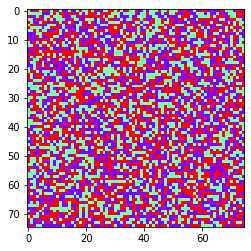

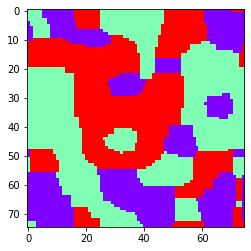

-10436.0


In [12]:
lattice=latticecreate(n)
plt.imshow(lattice, cmap="rainbow")
plt.show()
newlattice,image=calculateenergy(lattice,n,j,T,q)
plt.imshow(newlattice, cmap="rainbow")
plt.show()
ef=calceenergy(newlattice,n)
print(ef)

In [13]:
imageio.mimsave('75x75_potts.gif', image)

In [248]:
T=0.2
t=[]
energy=[]
while T<10:
    lattice=latticecreate(n)
    newlattice,image=calculateenergy(lattice,n,j,T,q)
    ef=calceenergy(newlattice,n)
    energy.append(ef)
    t.append(T)
    T=T+0.2

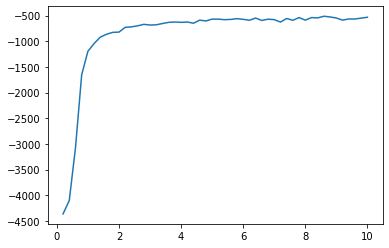

In [249]:
plt.plot(t,energy)